In [122]:
dice_no=60        #number of dice
dice_face=6         #number of dice face
dice_roll=100000  #number of rolls

In [123]:
from collections import Counter
import random
import sys
import pandas as pd
import matplotlib.pyplot as plot

In [124]:
%%time
roll_set=[]
for m in range(dice_roll):
    dice_set=[]
    #-----------------dice roll------------------------
    for n in range(dice_no):
        dice = random.randint(1,dice_face)
        dice_set.append(dice)
    #--------------------------------------------------
    roll_set.append(sum(dice_set))

#Since there are n number of dice, the minimum sum of the total dice must be the value of dice_no. 
#The maximum sum of a dice roll is the number of dice_face multiply by dice_no


#--------------count unique values in array_-----------------------
Freq_Count=[]
for x in range(dice_no,(dice_no*dice_face)+1):
    y=0
    for z in range(len(roll_set)):
       if x==roll_set[z]:
            y+=1
    Freq_Count.append({'Sum of Die':x,'Count of Sum':y,'Probability':(float(y/dice_roll))})
#------------------------------------------------------------------

CPU times: user 10.6 s, sys: 0 ns, total: 10.6 s
Wall time: 10.6 s


In [125]:
Freq_Table=pd.DataFrame(Freq_Count)
Freq_Table.head()

,Sum of Die,Count of Sum,Probability
0,60,0,0.0
1,61,0,0.0
2,62,0,0.0
3,63,0,0.0
4,64,0,0.0


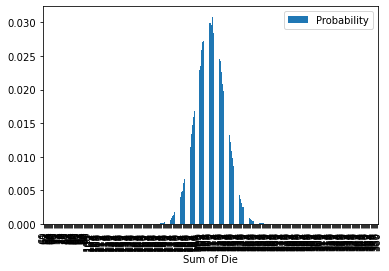

In [126]:
Freq_Table.plot(kind='bar', x='Sum of Die', y='Probability')
plot.show()

In [127]:
Top_5=Freq_Table.nlargest(10,'Probability')
Max_Sum=Top_5['Sum of Die'].max()
Min_Sum=Top_5['Sum of Die'].min()
Probability=Top_5['Probability'].sum()
"For rolling {} dices with {} faces for {} roll, you will have the probability of {} to have the total sum of die in range of {} and {}".format(dice_no, dice_face, dice_roll, "{:.2f}".format(Probability), Min_Sum, Max_Sum)

'For rolling 60 dices with 6 faces for 100000 roll, you will have the probability of 0.29 to have the total sum of die in range of 206 and 215'